## 1️⃣Loading Data & Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [83]:
# read data 
data = pd.read_csv("Adidas_Sales.csv")

In [84]:
# see top 5 rows

data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet


In [85]:
# see number of rows and columns

data.shape

(9641, 12)

In [86]:
# check missing values

data.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [87]:
# show values equal nan 
data[data.isna().any(axis=1)]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
6725,Foot Locker,1185732,1/29/2020,Northeast,New York,New York,Men's Apparel,NaN,850,"51,000","$15,300",Outlet
7882,Sports Direct,1197831,7/29/2020,South,Texas,Houston,Men's Apparel,NaN,500,"20,000","$6,000",Outlet


In [88]:
# drop values equal nan
data.dropna(subset=['Price per Unit'], inplace = True)

In [89]:
# see columns data type

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9639 non-null   object
 1   Retailer ID       9639 non-null   int64 
 2   Invoice Date      9639 non-null   object
 3   Region            9639 non-null   object
 4   State             9639 non-null   object
 5   City              9639 non-null   object
 6   Product           9639 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9639 non-null   object
 9   Total Sales       9639 non-null   object
 10  Operating Profit  9639 non-null   object
 11  Sales Method      9639 non-null   object
dtypes: int64(1), object(11)
memory usage: 979.0+ KB


In [90]:
# drop $ from Operating Profit and Price per Unit
data['Operating Profit'] = data['Operating Profit'].str.replace('$', '')
data['Price per Unit'] = data['Price per Unit'].str.replace('$', '')
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,103.00,218,"2,245","1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,103.00,163,"1,679",806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,10.00,700,"7,000","3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,15.00,575,"8,625","3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,15.00,475,"7,125","3,206",Outlet


In [91]:
# drop , from Total Sales and Operating Profit and Units Sold
data['Total Sales'] = data['Total Sales'].str.replace(',', '')
data['Operating Profit'] = data['Operating Profit'].str.replace(',', '')
data['Units Sold'] = data['Units Sold'].str.replace(',', '')
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,103.00,218,2245,1257,Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,103.00,163,1679,806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,10.00,700,7000,3150,Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,15.00,575,8625,3881,Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,15.00,475,7125,3206,Outlet


In [92]:
# change data type
data = data.astype({
    'Retailer ID': 'str',
    'Price per Unit': 'float64',
    'Units Sold': 'float64',
    'Total Sales': 'float64',
    'Operating Profit': 'float64'
})

In [93]:
data.duplicated().any()

np.False_

In [94]:
data.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit
count,9639.000000,9639.000000,9639.000000,9639.000000
mean,45.212159,256.692707,9311.035066,3437.782343
std,14.705009,214.039689,14177.614533,5416.691094
min,7.000000,0.000000,0.000000,0.000000
25%,35.000000,106.000000,425.000000,192.000000
50%,45.000000,176.000000,957.000000,436.000000
75%,55.000000,350.000000,15000.000000,5200.000000
max,110.000000,1275.000000,82500.000000,39000.000000


In [95]:
data.describe(include= object)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Sales Method
count,9639,9639,9639,9639,9639,9639,9639,9639
unique,6,4,724,5,50,52,7,3
top,Foot Locker,1185732,1/17/2021,West,California,Portland,Men's Street Footwear,Online
freq,2633,5261,77,2446,430,360,1610,4889


In [96]:
def count_plot(x_axis = None, y_axis = None, Hue = None, top = None):
    
    if x_axis :
        order = data[x_axis].value_counts()[:top].index
        
    else:
        order = data[y_axis].value_counts()[:top].index
        
    graph = sns.countplot(x = x_axis, y= y_axis, data = data, hue = Hue, order = order)
    
    for value in graph.containers:
        graph.bar_label(value)
        
    plt.show()
    

In [97]:
def box_plot(x_axis = None, y_axis = None):
    
    sns.boxplot(x = x_axis, y = y_axis , data = data)
    
    if x_axis:
        plt.ylabel(x_axis)
        plt.xlabel("distribution")
        
    else:
        plt.xlabel(y_axis)
        plt.ylabel("distribution")
    
    plt.show()

In [98]:
def pie_plot(column_name, explodeIndex = None):
    
    label = data[column_name].value_counts().index
    
    FRQ = data[column_name].value_counts()
    
    explodeList = [0] * data[column_name].nunique()  # [0,0]
    
    if explodeIndex is not None :
        explodeList[explodeIndex] = 0.1
    
    plt.pie(FRQ, labels = label, autopct= "%1.1f%%", shadow= True, explode = explodeList)
    
    plt.show()
    
    

In [99]:
def info(column_name):
    
    print(f"Number of nuique values is {data[column_name].nunique()}")
    
    print("-" * 15)
    
    print(f"unique values is: {data[column_name].unique()}")

In [100]:
data.sample()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
2985,West Gear,1128299,8/2/2020,West,Washington,Seattle,Women's Street Footwear,73.0,138.0,1007.0,393.0,Online


### Discovering `Retailer` Column

In [101]:
# see number of unique values

info("Retailer")

Number of nuique values is 6
---------------
unique values is: ['Walmart' 'West Gear' 'Sports Direct' 'Foot Locker' 'Amazon' "Kohl's"]


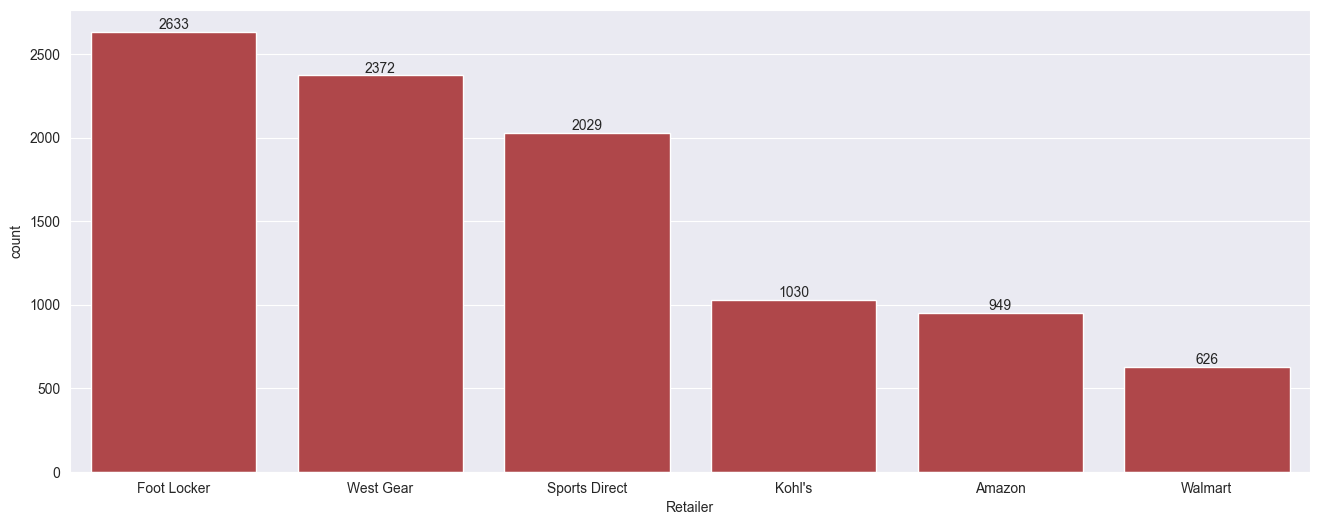

In [102]:
plt.figure(figsize= (16, 6))

count_plot(x_axis= "Retailer")

### Discovering `Region` Column

In [103]:
# see number of unique values

info("Region")

Number of nuique values is 5
---------------
unique values is: ['Southeast' 'South' 'Midwest' 'Northeast' 'West']


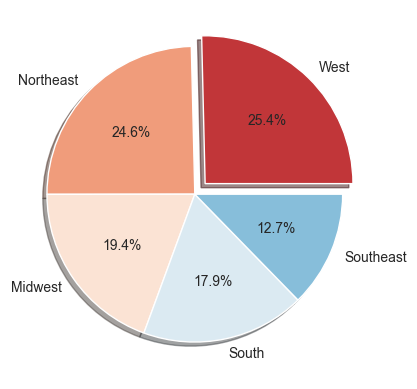

In [104]:
pie_plot(column_name= "Region", explodeIndex= 0)

### Discovering `Product` Column

In [105]:
# see number of unique values

info("Product")

Number of nuique values is 7
---------------
unique values is: ["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Men's aparel"]


In [106]:
data['Product'] = data['Product'].str.replace("Men's aparel", "Men's Apparel")

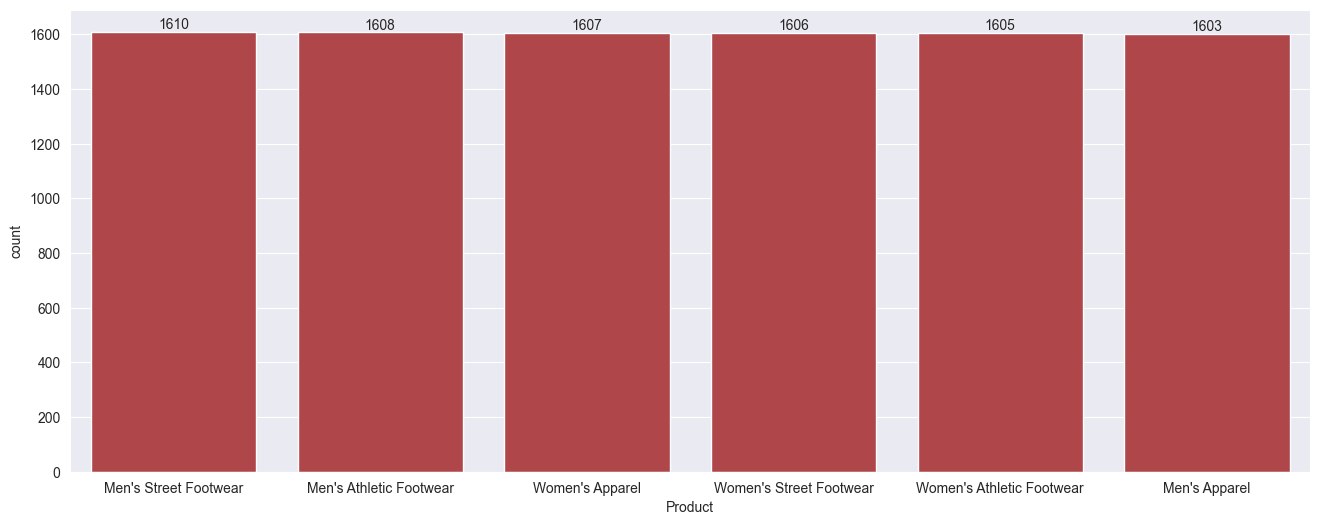

In [107]:
plt.figure(figsize= (16, 6))

count_plot(x_axis= "Product")

In [108]:
data.sample()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
3618,Foot Locker,1185732,11/9/2021,Northeast,Pennsylvania,Philadelphia,Men's Street Footwear,46.0,122.0,561.0,354.0,Online


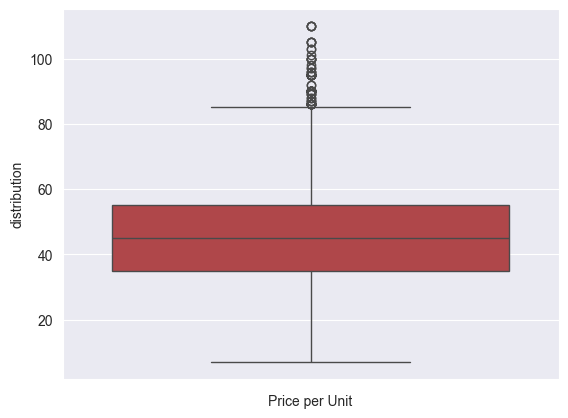

In [109]:
box_plot(y_axis="Price per Unit")

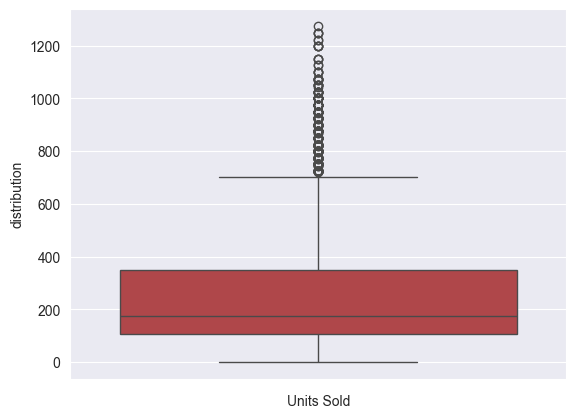

In [110]:
box_plot(y_axis="Units Sold")

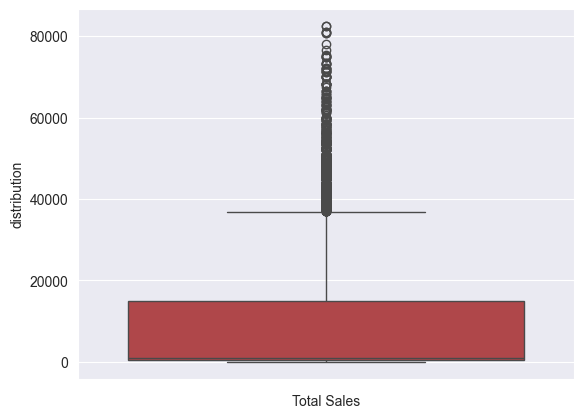

In [111]:
box_plot(y_axis="Total Sales")

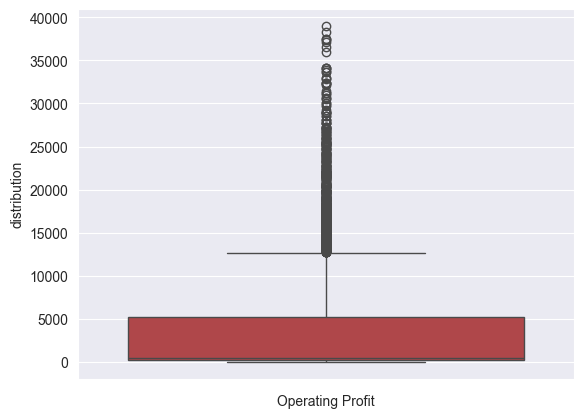

In [112]:
box_plot(y_axis="Operating Profit")

## Discovering `Sales Method` Column

In [113]:
info("Sales Method")

Number of nuique values is 3
---------------
unique values is: ['Online' 'Outlet' 'In-store']


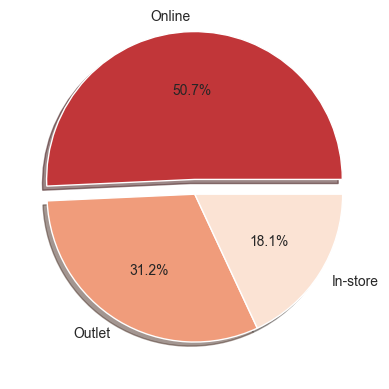

In [114]:
pie_plot("Sales Method", explodeIndex= 0)

In [115]:
info('Product')

Number of nuique values is 6
---------------
unique values is: ["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"]


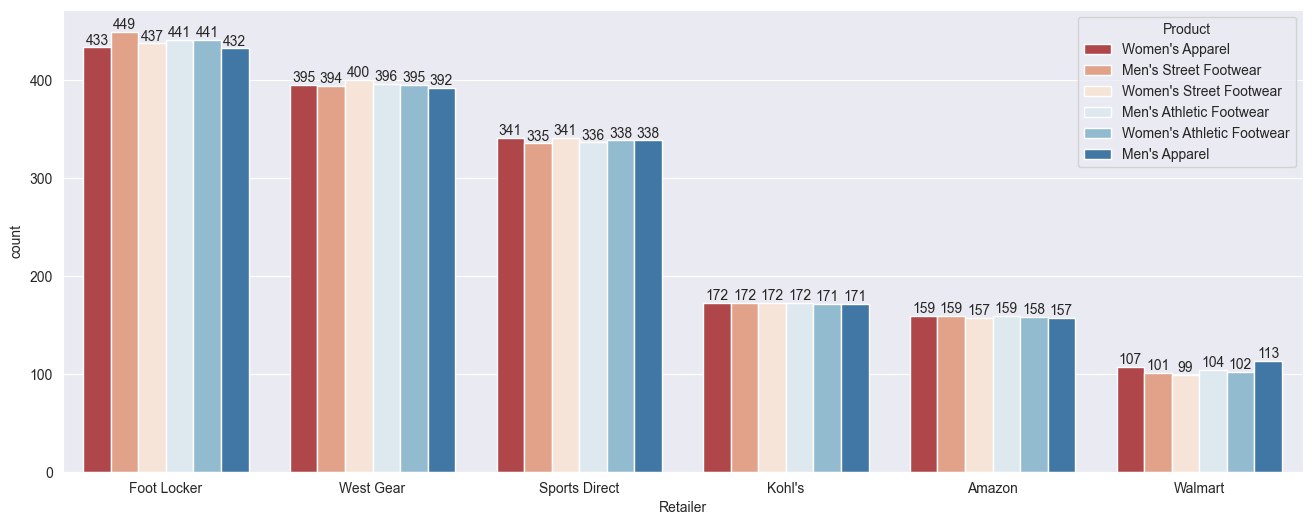

In [116]:
plt.figure(figsize= (16, 6))
count_plot(x_axis= "Retailer", Hue= "Product")

In [117]:
data.sample()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
654,Walmart,1197831,10/20/2020,South,Texas,Houston,Men's Street Footwear,43.0,234.0,1006.0,493.0,Online


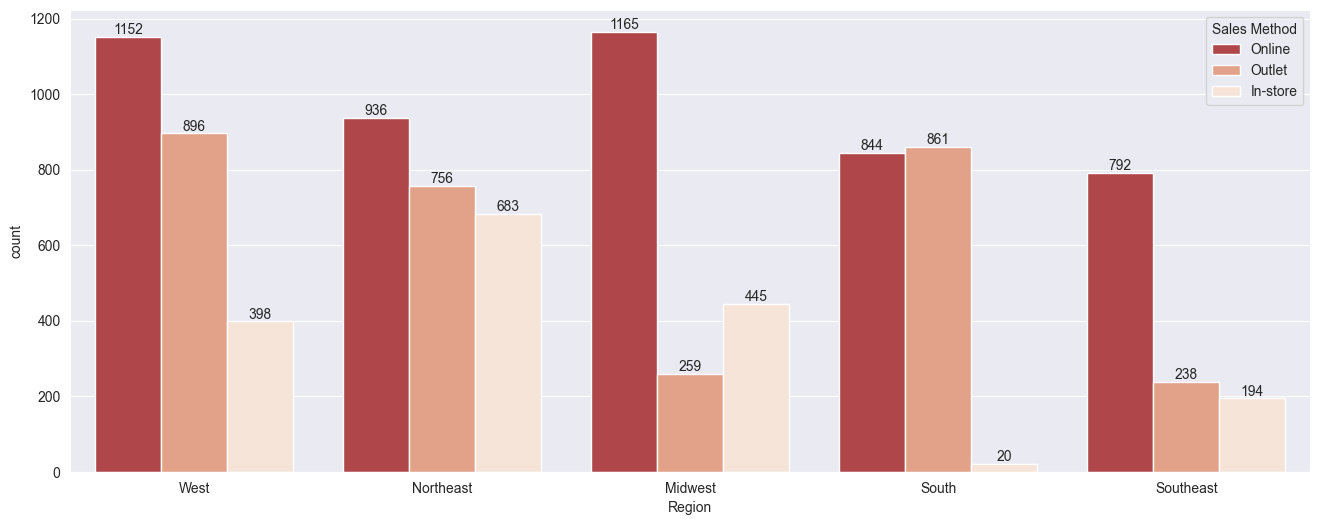

In [118]:
plt.figure(figsize= (16, 6))
count_plot(x_axis= "Region", Hue= "Sales Method")